<a href="https://colab.research.google.com/github/amrahmani/Machine-Learning/blob/main/Ch11_NonLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1:** Linear Spline

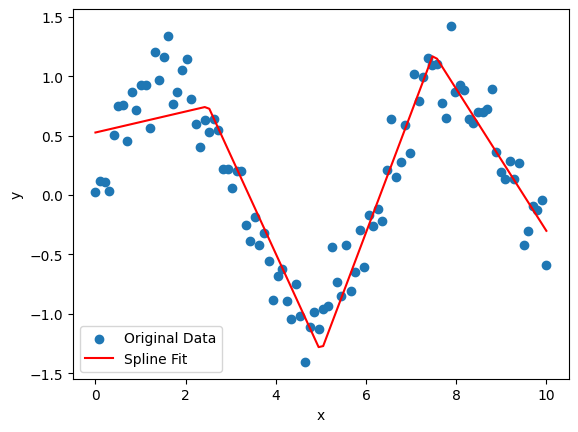

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer

# Generate sample data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

# Create spline basis functions based on the chosen parameters (number of knots, knot positions, degree), Then, transforms the input data into the new feature space based on the spline basis functions.
spline_transformer = SplineTransformer(n_knots=5, knots='quantile', degree=1)
# x.reshape(-1, 1): This reshapes 1D array x into a 2D array with a single column (each row is an array).
# -1 automatically determine the appropriate number of rows based on the size of the original array and the desired number of columns (1 here)
x_spline = spline_transformer.fit_transform(x.reshape(-1, 1))

# Fit a linear model to the transformed data
model = LinearRegression()
model.fit(x_spline, y)

# Predict values using the model
y_pred = model.predict(x_spline)

# Plot the original data, spline knots, and predicted values
plt.scatter(x, y, label="Original Data")
plt.plot(x, y_pred, label="Spline Fit", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Problem 2:** Linear Splines, Quadratic and Cubic Splines

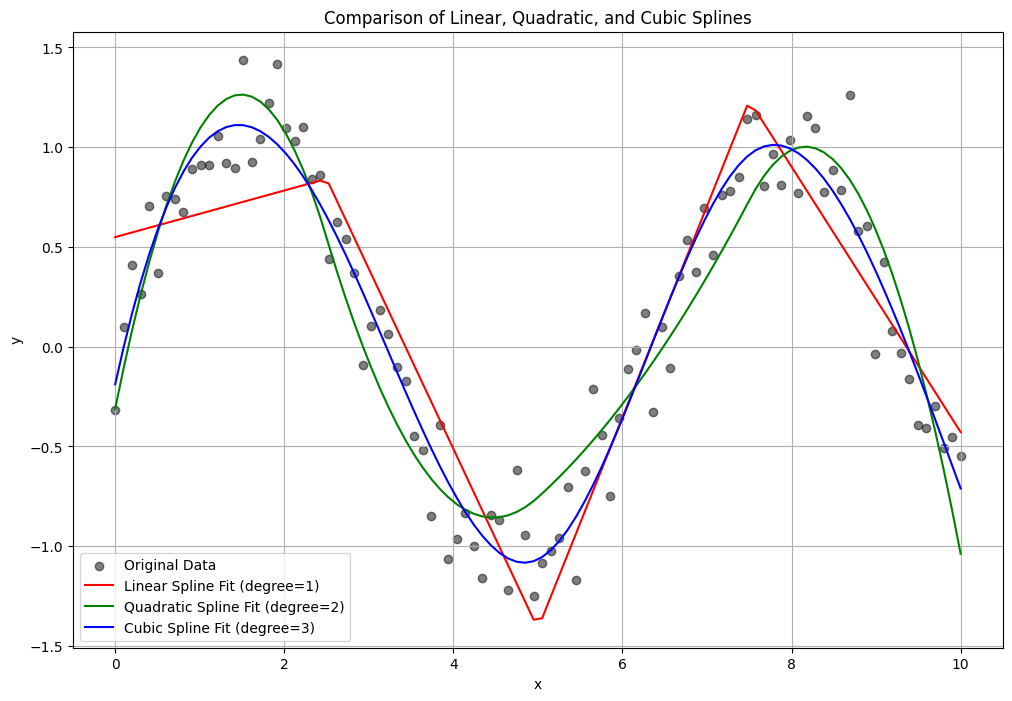

--- Model Performance Metrics ---
Linear Spline: MSE = 0.0870, R-squared = 0.8410
Quadratic Spline: MSE = 0.0617, R-squared = 0.8873
Cubic Spline: MSE = 0.0384, R-squared = 0.9300


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
x = np.linspace(0, 10, 100).reshape(-1, 1)  # Reshape for sklearn
y = np.sin(x) + np.random.normal(0, 0.2, 100).reshape(-1, 1)

# --- Linear Spline (degree=1) ---
spline_transformer_linear = SplineTransformer(n_knots=5, degree=1, include_bias=False)
x_spline_linear = spline_transformer_linear.fit_transform(x)
model_linear = LinearRegression()
model_linear.fit(x_spline_linear, y)
y_pred_linear = model_linear.predict(x_spline_linear)

# --- Quadratic Spline (degree=2) ---
spline_transformer_quadratic = SplineTransformer(n_knots=5, degree=2, include_bias=False)
x_spline_quadratic = spline_transformer_quadratic.fit_transform(x)
model_quadratic = LinearRegression()
model_quadratic.fit(x_spline_quadratic, y)
y_pred_quadratic = model_quadratic.predict(x_spline_quadratic)

# --- Cubic Spline (degree=3) ---
spline_transformer_cubic = SplineTransformer(n_knots=5, degree=3, include_bias=False)
x_spline_cubic = spline_transformer_cubic.fit_transform(x)
model_cubic = LinearRegression()
model_cubic.fit(x_spline_cubic, y)
y_pred_cubic = model_cubic.predict(x_spline_cubic)

# --- Plotting the original data and the different spline fits ---
plt.figure(figsize=(12, 8))
plt.scatter(x, y, label="Original Data", color='black', alpha=0.5)

# Plot each spline prediction
plt.plot(x, y_pred_linear, label="Linear Spline Fit (degree=1)", color='red')
plt.plot(x, y_pred_quadratic, label="Quadratic Spline Fit (degree=2)", color='green')
plt.plot(x, y_pred_cubic, label="Cubic Spline Fit (degree=3)", color='blue')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Linear, Quadratic, and Cubic Splines")
plt.legend()
plt.grid(True)
plt.show()

# --- Evaluating the models using metrics ---
print("--- Model Performance Metrics ---")

# Linear Spline
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)
print(f"Linear Spline: MSE = {mse_linear:.4f}, R-squared = {r2_linear:.4f}")

# Quadratic Spline
mse_quadratic = mean_squared_error(y, y_pred_quadratic)
r2_quadratic = r2_score(y, y_pred_quadratic)
print(f"Quadratic Spline: MSE = {mse_quadratic:.4f}, R-squared = {r2_quadratic:.4f}")

# Cubic Spline
mse_cubic = mean_squared_error(y, y_pred_cubic)
r2_cubic = r2_score(y, y_pred_cubic)
print(f"Cubic Spline: MSE = {mse_cubic:.4f}, R-squared = {r2_cubic:.4f}")

**Problem 3:** Linear Spline Regression vs. Smoothing splines

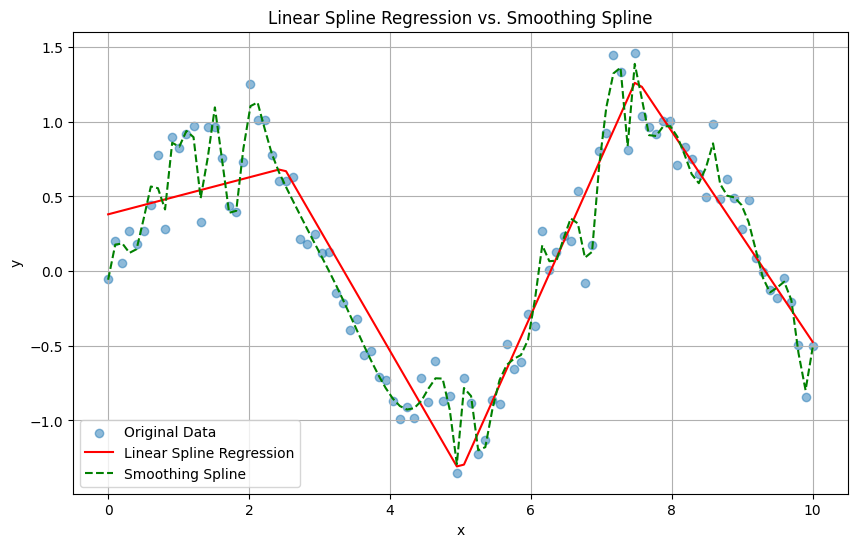

Metrics for Linear Spline Regression:
  MSE: 0.0647
  R-squared: 0.8651


Metrics for Smoothing Spline:
  MSE: 0.0100
  R-squared: 0.9792


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import SplineTransformer
from scipy.interpolate import UnivariateSpline
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

# 1- Linear Spline Regression
spline_transformer = SplineTransformer(n_knots=5, degree=1)
x_spline = spline_transformer.fit_transform(x.reshape(-1, 1))
model = LinearRegression()
model.fit(x_spline, y)
y_pred_linear_spline = model.predict(x_spline)

# 2- Smoothing Spline
smoothing_spline = UnivariateSpline(x, y, s=1)
y_pred_smoothing_spline = smoothing_spline(x)

# Calculate metrics for each model
mse_linear_spline = mean_squared_error(y, y_pred_linear_spline)
r2_linear_spline = r2_score(y, y_pred_linear_spline)

mse_smoothing_spline = mean_squared_error(y, y_pred_smoothing_spline)
r2_smoothing_spline = r2_score(y, y_pred_smoothing_spline)

# Plot the original data, linear spline, and smoothing spline fits
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Original Data", alpha=0.5)
plt.plot(x, y_pred_linear_spline, label="Linear Spline Regression", color='red')
plt.plot(x, y_pred_smoothing_spline, label="Smoothing Spline", color='green', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Spline Regression vs. Smoothing Spline")
plt.legend()
plt.grid(True)
plt.show()

# Print the metrics
print(f"Metrics for Linear Spline Regression:")
print(f"  MSE: {mse_linear_spline:.4f}")
print(f"  R-squared: {r2_linear_spline:.4f}")
print("\n")
print(f"Metrics for Smoothing Spline:")
print(f"  MSE: {mse_smoothing_spline:.4f}")
print(f"  R-squared: {r2_smoothing_spline:.4f}")

**Problem 4**: Fit the following models: Single Linear Regression, Polynomial Regression, Linear Spline, Quadratic Splines, and Cubic Splines, on a dataset with features {age and wage}.

Dataset=https://github.com/amrahmani/Machine-Learning/blob/main/wage_data.csv

First, visualizes the feature with scatter plots, and compares the models using regression metrics.



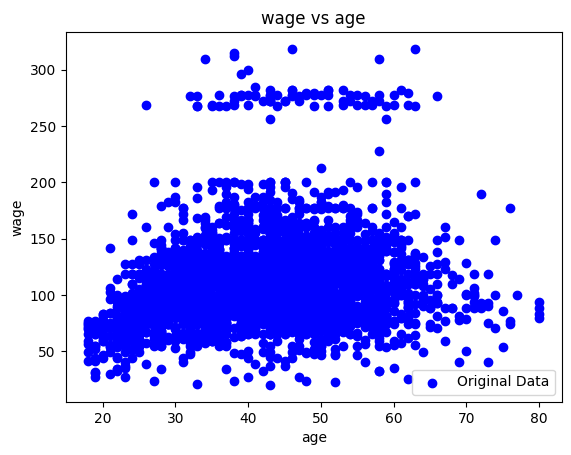

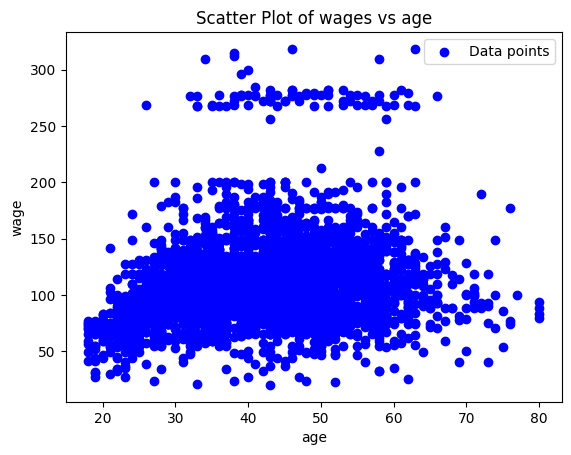

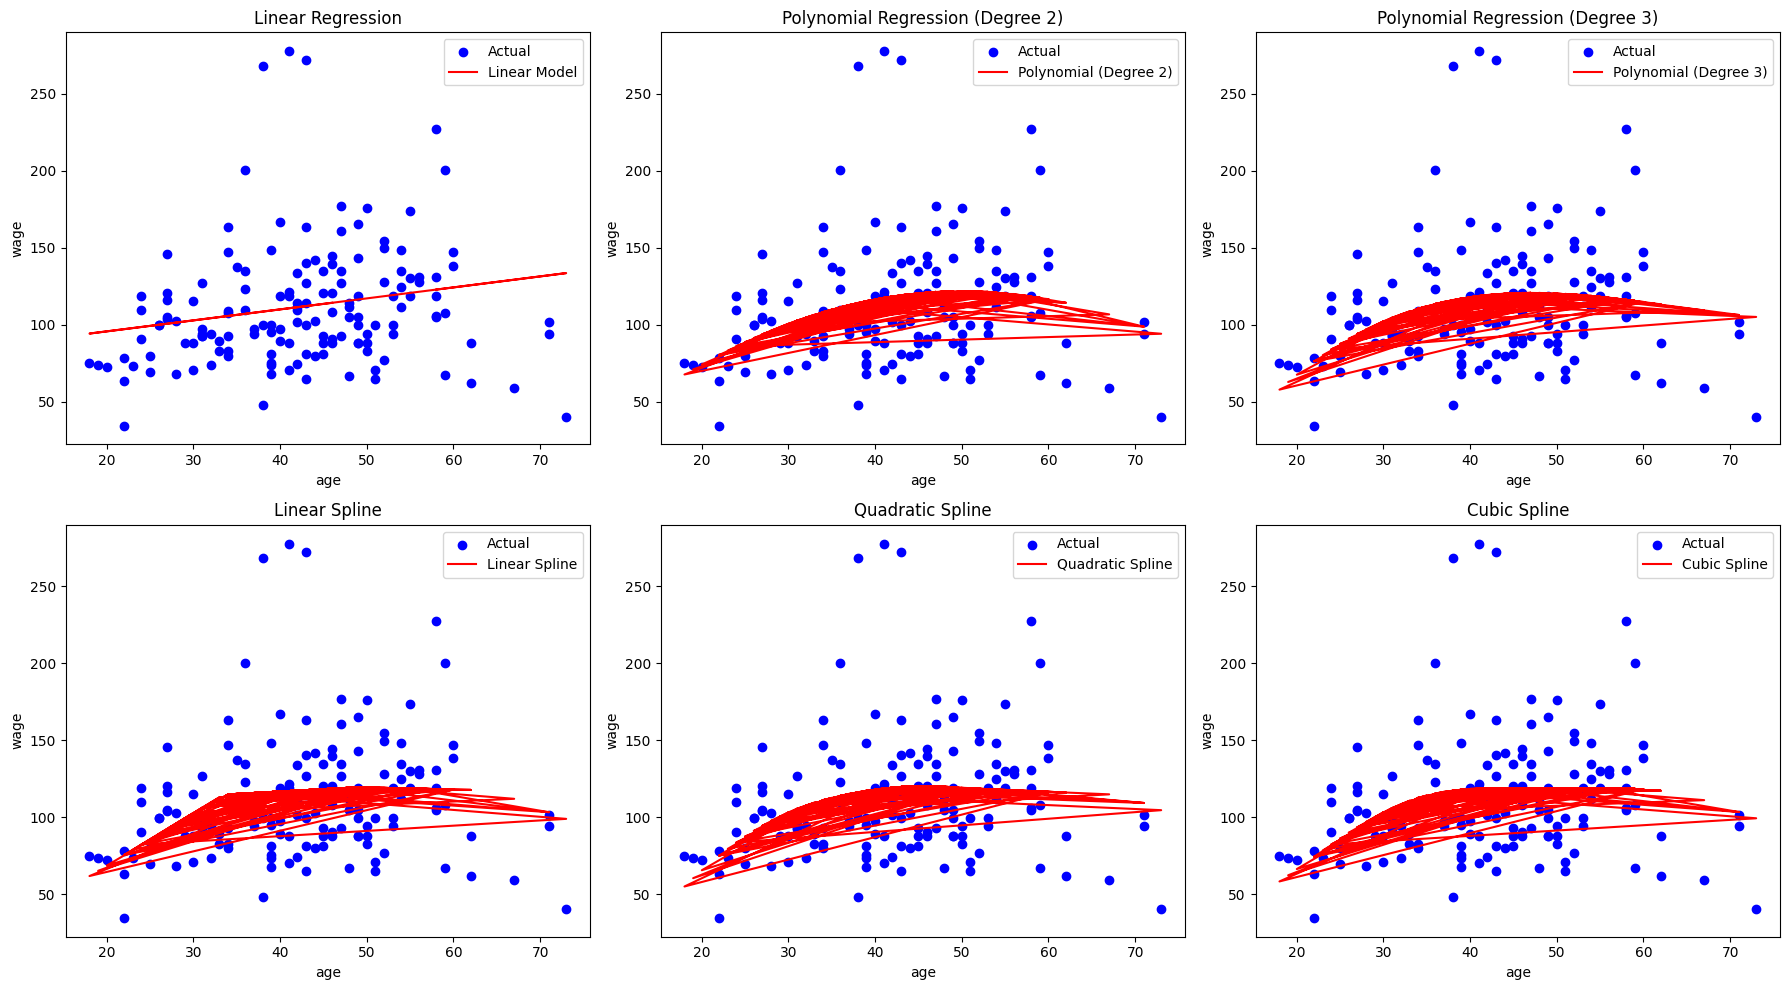

Model Comparison:
Linear Regression - MSE: 1502.98, R^2: 0.03
Polynomial Regression (Degree 2) - MSE: 1400.85, R^2: 0.09
Polynomial Regression (Degree 3) - MSE: 1415.04, R^2: 0.08
Linear Spline - MSE: 1410.32, R^2: 0.09
Quadratic Spline - MSE: 1419.50, R^2: 0.08
Cubic Spline - MSE: 1403.68, R^2: 0.09


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
import statsmodels.api as sm

# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/wage_data.csv'
df = pd.read_csv(url)

# Step 2: Extract the features and target variable
X = df['age'].values.reshape(-1, 1)
y = df['wage'].values

# Scatter plot of the data
plt.scatter(X, y, color='blue', label='Original Data')
plt.xlabel('age')
plt.ylabel('wage')
plt.title('wage vs age')
plt.legend()
plt.show()

# Step 3: Visualize the data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Scatter Plot of wages vs age')
plt.legend()
plt.show()

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Step 5: Fit and evaluate different models

# 5.1 Single Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# 5.2 Polynomial Regression (degree 2)
poly2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly2.fit(X_train, y_train)
y_pred_poly2 = poly2.predict(X_test)
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

# 5.3 Polynomial Regression (degree 3)
poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3.fit(X_train, y_train)
y_pred_poly3 = poly3.predict(X_test)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

# 5.4 Linear Spline
spline_transformer = SplineTransformer(degree=1, n_knots=5)
spline_model = make_pipeline(spline_transformer, LinearRegression())
spline_model.fit(X_train, y_train)
y_pred_spline = spline_model.predict(X_test)
mse_spline = mean_squared_error(y_test, y_pred_spline)
r2_spline = r2_score(y_test, y_pred_spline)

# 5.5 Quadratic Spline
spline_transformer_quad = SplineTransformer(degree=2, n_knots=5)
spline_model_quad = make_pipeline(spline_transformer_quad, LinearRegression())
spline_model_quad.fit(X_train, y_train)
y_pred_spline_quad = spline_model_quad.predict(X_test)
mse_spline_quad = mean_squared_error(y_test, y_pred_spline_quad)
r2_spline_quad = r2_score(y_test, y_pred_spline_quad)

# 5.6 Cubic Spline
spline_transformer_cubic = SplineTransformer(degree=3, n_knots=5)
spline_model_cubic = make_pipeline(spline_transformer_cubic, LinearRegression())
spline_model_cubic.fit(X_train, y_train)
y_pred_spline_cubic = spline_model_cubic.predict(X_test)
mse_spline_cubic = mean_squared_error(y_test, y_pred_spline_cubic)
r2_spline_cubic = r2_score(y_test, y_pred_spline_cubic)

# Step 6: Plot the models and predictions
plt.figure(figsize=(18, 10))

# Linear Regression
plt.subplot(231)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Model')
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Linear Regression')
plt.legend()

# Polynomial Regression (Degree 2)
plt.subplot(232)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_poly2, color='red', label='Polynomial (Degree 2)')
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()

# Polynomial Regression (Degree 3)
plt.subplot(233)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_poly3, color='red', label='Polynomial (Degree 3)')
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()

# Linear Spline
plt.subplot(234)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_spline, color='red', label='Linear Spline')
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Linear Spline')
plt.legend()

# Quadratic Spline
plt.subplot(235)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_spline_quad, color='red', label='Quadratic Spline')
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Quadratic Spline')
plt.legend()

# Cubic Spline
plt.subplot(236)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_spline_cubic, color='red', label='Cubic Spline')
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Cubic Spline')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Compare the models using regression metrics
print("Model Comparison:")
print(f"Linear Regression - MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}")
print(f"Polynomial Regression (Degree 2) - MSE: {mse_poly2:.2f}, R^2: {r2_poly2:.2f}")
print(f"Polynomial Regression (Degree 3) - MSE: {mse_poly3:.2f}, R^2: {r2_poly3:.2f}")
print(f"Linear Spline - MSE: {mse_spline:.2f}, R^2: {r2_spline:.2f}")
print(f"Quadratic Spline - MSE: {mse_spline_quad:.2f}, R^2: {r2_spline_quad:.2f}")
print(f"Cubic Spline - MSE: {mse_spline_cubic:.2f}, R^2: {r2_spline_cubic:.2f}")




In [8]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.3 MB/s eta 0:00:00


**Problem 5**: Fit the following models: Multiple Linear Regression, **Generalized Additive Model** with Linear Spline, and **Generalized Additive Models** with Polynomial Splines, on a dataset with features {age, education and wage}.

Dataset=https://github.com/amrahmani/Machine-Learning/blob/main/wage_data.csv

First, visualize the feature with scatter plots, and then compare the models using regression metrics.



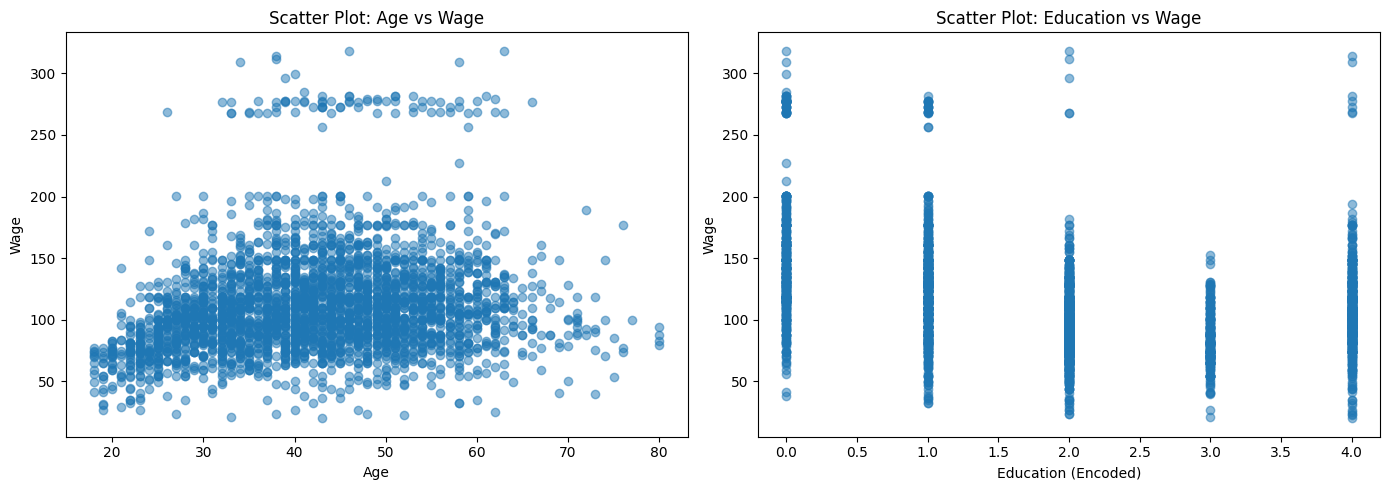

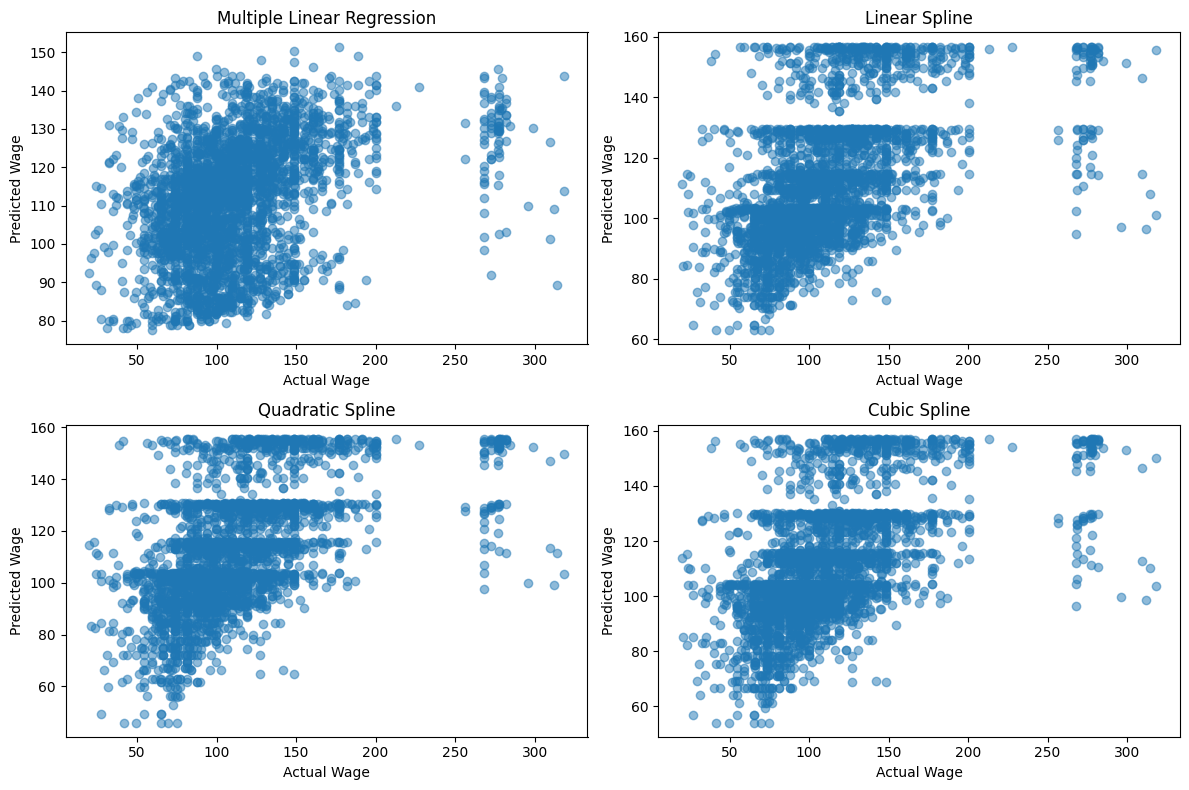

Multiple Linear Regression: MSE=1504.85, MAE=27.53, R^2=0.14
Linear Spline: MSE=1253.43, MAE=24.21, R^2=0.28
Quadratic Spline: MSE=1240.06, MAE=24.15, R^2=0.29
Cubic Spline: MSE=1242.94, MAE=24.18, R^2=0.29


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/wage_data.csv'
df = pd.read_csv(url)

# Step 2: Delete missing values
df = df.dropna()

# Step 3: Encode the categorical variable 'education'
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['education'])

# Define features and target
X = df[['age', 'education_encoded']]
y = df['wage']

# Step 4: Visualize the data
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['age'], y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Scatter Plot: Age vs Wage')

plt.subplot(1, 2, 2)
plt.scatter(df['education_encoded'], y, alpha=0.5)
plt.xlabel('Education (Encoded)')
plt.ylabel('Wage')
plt.title('Scatter Plot: Education vs Wage')

plt.tight_layout()
plt.show()

# Step 5: Fit models

# 1. Multiple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# 2. Linear Spline
linear_spline = LinearGAM(s(0, n_splines=4) + s(1, n_splines=5))
linear_spline.fit(X, y)
y_pred_spline = linear_spline.predict(X)

# 3. Quadratic Spline
# LinearGAM: is the class from the pyGAM library that creates a Generalized Additive Model.
# s(0, n_splines=5, spline_order=2): specifies a spline for the first predictor (index 0).
# n_splines=5: sets the number of basis functions used to represent the spline.
# spline_order=2: sets the order of the spline. A quadratic spline has an order of 2.
# s(1, n_splines=5, spline_order=2): specifies a spline for the second predictor (index 1). It has the same parameters as the first spline.
# +: combines the two splines into a single model.
quadratic_spline = LinearGAM(s(0, n_splines=5, spline_order=2) + s(1, n_splines=5, spline_order=2))
quadratic_spline.fit(X, y)
y_pred_quad_spline = quadratic_spline.predict(X)

# 4. Cubic Spline
cubic_spline = LinearGAM(s(0, n_splines=5, spline_order=3) + s(1, n_splines=5, spline_order=3))
cubic_spline.fit(X, y)
y_pred_cubic_spline = cubic_spline.predict(X)

# Step 6: Plot diagrams for each model

plt.figure(figsize=(12, 8))

# Multiple Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y, y_pred_lin, alpha=0.5)
plt.xlabel('Actual Wage')
plt.ylabel('Predicted Wage')
plt.title('Multiple Linear Regression')

# Linear Spline
plt.subplot(2, 2, 2)
plt.scatter(y, y_pred_spline, alpha=0.5)
plt.xlabel('Actual Wage')
plt.ylabel('Predicted Wage')
plt.title('Linear Spline')

# Quadratic Spline
plt.subplot(2, 2, 3)
plt.scatter(y, y_pred_quad_spline, alpha=0.5)
plt.xlabel('Actual Wage')
plt.ylabel('Predicted Wage')
plt.title('Quadratic Spline')

# Cubic Spline
plt.subplot(2, 2, 4)
plt.scatter(y, y_pred_cubic_spline, alpha=0.5)
plt.xlabel('Actual Wage')
plt.ylabel('Predicted Wage')
plt.title('Cubic Spline')

plt.tight_layout()
plt.show()

# Step 7: Compare Regression Metrics
models = ['Multiple Linear Regression', 'Linear Spline', 'Quadratic Spline', 'Cubic Spline']
predictions = [y_pred_lin, y_pred_spline, y_pred_quad_spline, y_pred_cubic_spline]

for model, pred in zip(models, predictions):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    print(f'{model}: MSE={mse:.2f}, MAE={mae:.2f}, R^2={r2:.2f}')


**Practice:**

**Task 1:** For Problem 1, try different numbers of knots, also try knots='*uniform*' or knots='*quantile*'.

**Task 2:** For Problem 2, try a different number of knots.

**Task 3:** For Problem 3, try different s values, *s* is the smoothing factor, *s >= 0.0*.

**Task 4:** For Problem 4, try different features, such as *education*. Do not forget to convert categorical data to numerical format first.

**Task 5:** For Problem 5, find a dataset from Kaggle and for regression apply the same process of training, tuning hyperparameters, and evaluating the model.